# LetsGrowMore #Nov2021

**Author : Janvi Nandre**

**Task 3 : A Neural Network That Can Read Handwriting**

**Level : Advanced**

**Language : Python**

**Environment : Google Collab Notebook**

**Task description** : Develop A Neural Network That Can Read Handwriting:

Begin your neural network machine learning project with the MNIST Handwritten Digit Classification Challenge and using Tensorflow and CNN. It has a very user-friendly interface that’s ideal for beginners. Dataset can be seen on MNIST.


In [ ]:
# import required libraries

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from keras.datasets import mnist

In [ ]:
# load the dataset

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
#print shape of dataset i.e no of rows and columns
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(y_test.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


##Data visualization

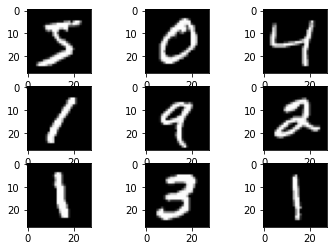

In [ ]:
# plot the data images
for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
plt.show()

## **Data Normalization**

In [ ]:
# As the data is in greyscale we can normalize it between 0 and 1.
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

## **Create our Neural Network**

In [ ]:
model=tf.keras.models.Sequential()
#Input layer
model.add(tf.keras.layers.Flatten (input_shape=(28,28)))
#Hidden Layer 1
model.add(tf.keras.layers.Dense(units=128, activation="relu")) 
#Hidden Layer 2
model.add(tf.keras.layers.Dense(units=128, activation="relu")) 
#output layer
model.add(tf.keras.layers.Dense(units=10, activation="softmax")) 

In [ ]:
# compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [ ]:
#fit the model
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2624 - accuracy: 0.9232
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1078 - accuracy: 0.9666
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0723 - accuracy: 0.9771
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0544 - accuracy: 0.9825
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0401 - accuracy: 0.9872


## **Model Evaluation**

In [ ]:
# evaluate model using test dataset
loss, acc = model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0932 - accuracy: 0.9726


## **Test model on handwritten digits.**

This number is: 2


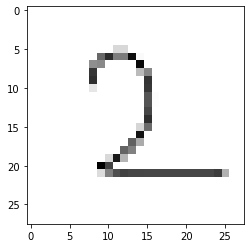

This number is: 3


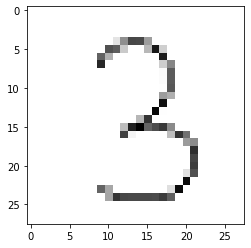

TypeError: ignored

In [ ]:
for x in range(1,6):
  img = cv.imread(f'{x}.png')[:,:,0] 
  img = np.invert(np.array([img]))
  prediction = model.predict(img)
  print(f'This number is: {np.argmax(prediction)}')
  plt.imshow(img[0], cmap = plt.cm.binary)
  plt.show()

**We can see that our model is predicting correct number classes from the images**

The NonType error is due to openCV None subsription restrictions.